# Import

In [1]:
#import pytorch
import torch 

#nn: Neural network의 basic class
from torch import nn 

#import torchvision: pytorch와 함께 사용되는 computer vision용 라이브러리
import torchvision 

# datasets: torchvision이 제공하는 dataset 가져오기, 
# transforms: torchvision이 제공하는 이미지 or 영상변환 기능
from torchvision import datasets, transforms

# import numpy: vector 계산
import numpy as np

#import matplotlib: loss, accuracy 시각화
import matplotlib.pyplot as plt


In [2]:
# 폰트 주변이 흐릿하게 보이는 것을 방지해 글씨가 좀 더 선명하게 보임
%config InlineBackend.figure_format='retina'

In [3]:
# set the random seed
torch.manual_seed(316)

# Data download & split

## original data

In [4]:
# convert to tensor and normalize
transform = transforms.Compose(
    [
        # ToTensor를 이용해 PIL이미지/ndarray를 tensor로 변환
        transforms.ToTensor(),
        # normalize a tensor image or video with mean and standard deviation
        transforms.Normalize((0.5071, 0.4867, 0.4408), (0.2675, 0.2565, 0.2761)),
    ]
)

In [5]:
transform_aug = transforms.Compose([
    # random 뒤집기
    transforms.RandomHorizontalFlip(),
    # 잘라내기
    transforms.RandomCrop(32, padding=2),
    # 회전
    transforms.RandomRotation(10),
    # tensor 변환
    transforms.ToTensor(),
    # normalize
    transforms.Normalize((0.5071, 0.4867, 0.4408), (0.2675, 0.2565, 0.2761))
])

### Download

In [6]:
# import dataset(train data, transformation, download in my drive folder)
dataset = datasets.CIFAR100('DeepLearning', download=True, train=True)

Files already downloaded and verified


### split

In [7]:
# length of training set
len_trainset = int(len(dataset) * 0.8)
## length of validation set
len_valset = len(dataset) - len_trainset
# train, valset split
trainset, valset = torch.utils.data.random_split(dataset, [len_trainset,len_valset])

In [8]:
#augmentation위한 copy
import copy
# trainset 을 다른 address에 복사(for trainset augmentation)
trainset_aug = copy.deepcopy(trainset)
# trainset transformation
trainset.dataset.transform = transform
# augmented trainset transformation
trainset_aug.dataset.transform = transform_aug

## Combine all the datasets(original, augmented data)

In [9]:
# Combine original and augmented datasets
trainset_combined = torch.utils.data.ConcatDataset([trainset, trainset_aug])
batch_size=64

In [10]:
# Create a DataLoader for the combined dataset
trainloader = torch.utils.data.DataLoader(
    trainset_combined, 
    batch_size=batch_size, 
    shuffle=True
)

In [11]:
#print the length of train set
print(len(trainset_combined))

80000


In [12]:
#print the length of validation set
print(len(valset))

10000


In [13]:
# loader for the validation set
#set validation loader
valloader = torch.utils.data.DataLoader(
    valset, #with valset
    batch_size=batch_size, # set batchsize
    shuffle=True #shuffle
)

# Explore data

In [14]:
# data에 있는 index가 무슨 class의미하는지 알아내기
idx_to_class = {v:k for k,v in trainset.dataset.class_to_idx.items()}
# print
idx_to_class

{0: 'apple',
 1: 'aquarium_fish',
 2: 'baby',
 3: 'bear',
 4: 'beaver',
 5: 'bed',
 6: 'bee',
 7: 'beetle',
 8: 'bicycle',
 9: 'bottle',
 10: 'bowl',
 11: 'boy',
 12: 'bridge',
 13: 'bus',
 14: 'butterfly',
 15: 'camel',
 16: 'can',
 17: 'castle',
 18: 'caterpillar',
 19: 'cattle',
 20: 'chair',
 21: 'chimpanzee',
 22: 'clock',
 23: 'cloud',
 24: 'cockroach',
 25: 'couch',
 26: 'crab',
 27: 'crocodile',
 28: 'cup',
 29: 'dinosaur',
 30: 'dolphin',
 31: 'elephant',
 32: 'flatfish',
 33: 'forest',
 34: 'fox',
 35: 'girl',
 36: 'hamster',
 37: 'house',
 38: 'kangaroo',
 39: 'keyboard',
 40: 'lamp',
 41: 'lawn_mower',
 42: 'leopard',
 43: 'lion',
 44: 'lizard',
 45: 'lobster',
 46: 'man',
 47: 'maple_tree',
 48: 'motorcycle',
 49: 'mountain',
 50: 'mouse',
 51: 'mushroom',
 52: 'oak_tree',
 53: 'orange',
 54: 'orchid',
 55: 'otter',
 56: 'palm_tree',
 57: 'pear',
 58: 'pickup_truck',
 59: 'pine_tree',
 60: 'plain',
 61: 'plate',
 62: 'poppy',
 63: 'porcupine',
 64: 'possum',
 65: 'rabbit',

In [15]:
# lmage, label 저장
images, labels = next(iter(trainloader))

In [16]:
# image size print
images.shape

torch.Size([64, 3, 32, 32])

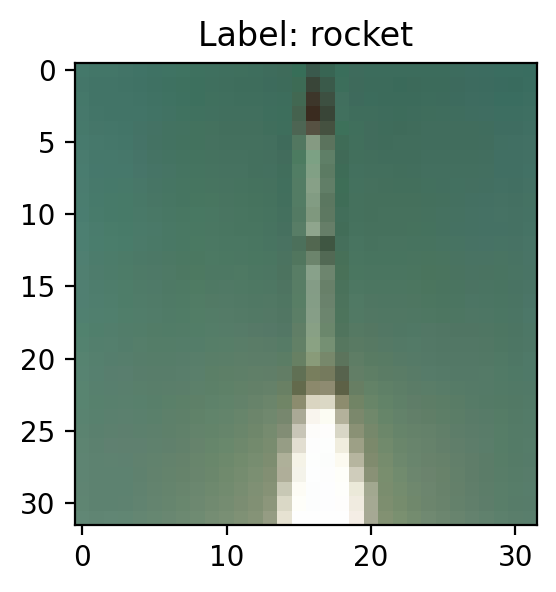

In [17]:
# 3*3으로 figure 크기설정
fig, ax= plt.subplots(figsize=(3,3))
# initialize index
img_idx=0
# index로 label이름 알아내기
label=idx_to_class[int(labels[img_idx])]

# transpose to print color image
image = np.transpose(images[img_idx].numpy(), (1, 2, 0))

#unnormalize
#image = image * np.array(std) + np.array(mean) > restore original color
image = image * np.array([0.2675, 0.2565, 0.2761]) + np.array([0.5071, 0.4867, 0.4408])

# to ensure they are within a valid pixel value range
image = np.clip(image, 0, 1)

#print image
ax.imshow(image)
# set title
ax.set_title(f"Label: {label}")
#print image
plt.show()

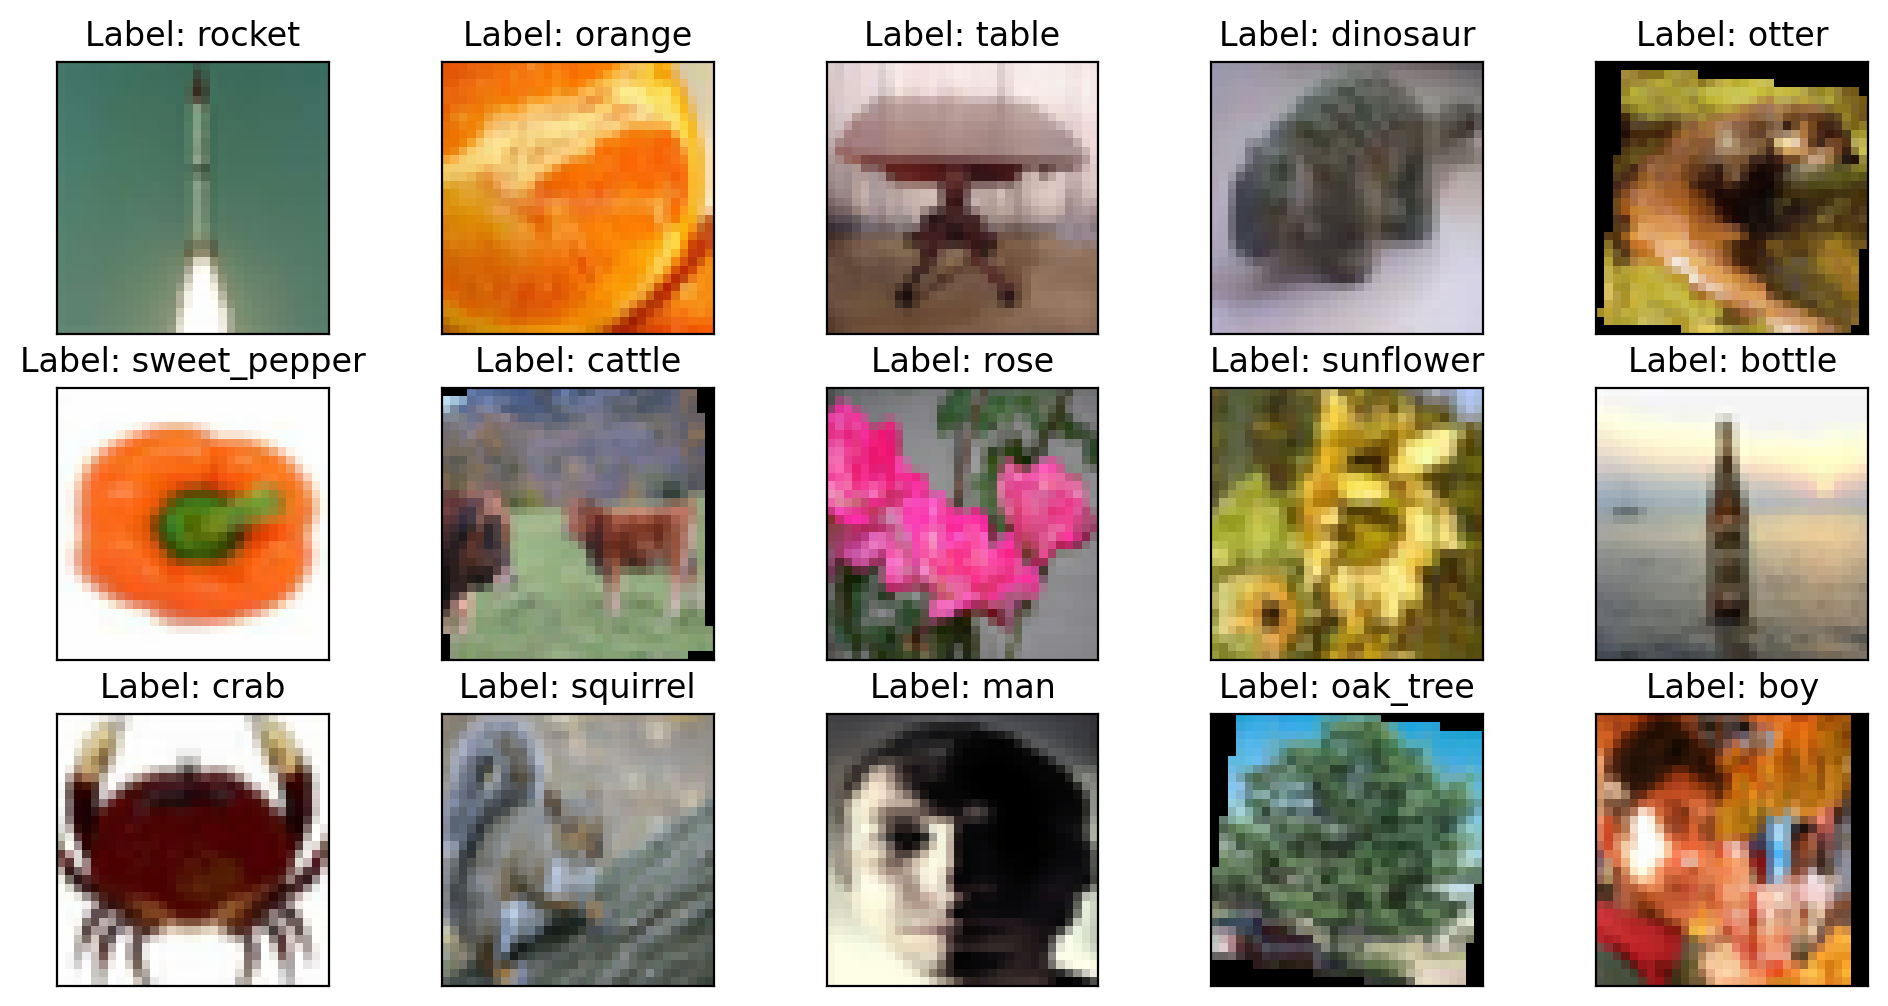

In [18]:
# 5*3으로 출력
fig, ax = plt.subplots(ncols=5, nrows=3, figsize=(12,6))
# ax 1차원으로 바꾸기
ax = np.ravel(ax)
# 15개 반복
for index in range(15):
    # transpose to print color image
    image = np.transpose(images[index].numpy(), (1, 2, 0))
    #unnormalize
    #image = image * np.array(std) + np.array(mean)
    image = image * np.array([0.2675, 0.2565, 0.2761]) + np.array([0.5071, 0.4867, 0.4408])

    # to ensure they are within a valid pixel value range
    image = np.clip(image, 0, 1)
    # index별로 image 출력
    ax[index].imshow(image)
    # store label
    label=idx_to_class[int(labels[index])]
    # set title
    ax[index].set_title(f"Label: {label}")
    # remove x axis
    ax[index].set_xticks([])
    # remove y axis
    ax[index].set_yticks([])

# Build Neural Network

In [47]:
# Build neural network
class Network(nn.Module): 
    def __init__(self):
        # inherit nn.Module class
        super().__init__()

        
        # A04_model.jpeg 파일에 model architecture 그림 있습니다.

        # store sequential model to self.feature_extraction
        self.feature_extraction = nn.Sequential(

            ### YOUR CODE STARTS HERE
            
            nn.Conv2d(in_channels=3, out_channels=256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Dropout(p=0.25),


            nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Dropout(p=0.25),
            
            nn.Conv2d(in_channels=512, out_channels=1024, kernel_size=3, padding=1),
            nn.BatchNorm2d(1024),
            nn.ReLU(),
            
            nn.Conv2d(in_channels=1024, out_channels=1024, kernel_size=3, padding=1),
            nn.BatchNorm2d(1024),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Dropout(p=0.4),

            nn.Flatten()

            
            ### YOUR CODE ENDS HERE
        )

        # store sequential model to self.classifier
        self.classifier = nn.Sequential(

            ### YOUR CODE STARTS HERE

            nn.Linear(4*4*1024, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(p=0.4),

            nn.Linear(512,100)

            ### YOUR CODE ENDS HERE
        )
    
    # define forward function
    def forward(self, x: torch.Tensor) -> torch.Tensor: 
        # out1 contains feature extracted parameters
        out1 = self.feature_extraction(x)
        # out2 contains flattend parameters
        out2 = torch.flatten(out1, 1)
        # out3 contains final output
        out3 = self.classifier(out2)
        # return the final output
        return out3 
# set model
model = Network()
model.to("cuda")
# print the model structure
print(model)

Network(
  (feature_extraction): Sequential(
    (0): Conv2d(3, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Dropout(p=0.25, inplace=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): ReLU()
    (14): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): BatchNorm

In [48]:
# total params 변수생성
total_params = 0
# model layer이름, 값 반복
for name, param in model.named_parameters():
    # layer이름, parameter size, parameter 개수 출력
    print(name, param.shape, param.numel())
    # layer마다 파라미터 개수 더하기
    total_params += param.numel()
# print
print(f"Total number of parameters = {total_params}")

feature_extraction.0.weight torch.Size([256, 3, 3, 3]) 6912
feature_extraction.0.bias torch.Size([256]) 256
feature_extraction.1.weight torch.Size([256]) 256
feature_extraction.1.bias torch.Size([256]) 256
feature_extraction.3.weight torch.Size([256, 256, 3, 3]) 589824
feature_extraction.3.bias torch.Size([256]) 256
feature_extraction.4.weight torch.Size([256]) 256
feature_extraction.4.bias torch.Size([256]) 256
feature_extraction.6.weight torch.Size([256, 256, 3, 3]) 589824
feature_extraction.6.bias torch.Size([256]) 256
feature_extraction.7.weight torch.Size([256]) 256
feature_extraction.7.bias torch.Size([256]) 256
feature_extraction.11.weight torch.Size([512, 256, 3, 3]) 1179648
feature_extraction.11.bias torch.Size([512]) 512
feature_extraction.12.weight torch.Size([512]) 512
feature_extraction.12.bias torch.Size([512]) 512
feature_extraction.14.weight torch.Size([512, 512, 3, 3]) 2359296
feature_extraction.14.bias torch.Size([512]) 512
feature_extraction.15.weight torch.Size([512

In [49]:
# torch summary import
from torchsummary import summary

In [50]:
# batch size마다 모델 shape summary
summary(model, (3, 32, 32), batch_size=batch_size)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [64, 256, 32, 32]           7,168
       BatchNorm2d-2          [64, 256, 32, 32]             512
              ReLU-3          [64, 256, 32, 32]               0
            Conv2d-4          [64, 256, 32, 32]         590,080
       BatchNorm2d-5          [64, 256, 32, 32]             512
              ReLU-6          [64, 256, 32, 32]               0
            Conv2d-7          [64, 256, 32, 32]         590,080
       BatchNorm2d-8          [64, 256, 32, 32]             512
              ReLU-9          [64, 256, 32, 32]               0
        MaxPool2d-10          [64, 256, 16, 16]               0
          Dropout-11          [64, 256, 16, 16]               0
           Conv2d-12          [64, 512, 16, 16]       1,180,160
      BatchNorm2d-13          [64, 512, 16, 16]           1,024
             ReLU-14          [64, 512,

# Training and Validation

In [51]:
# cuda 가능한지 확인
torch.cuda.is_available()

True

In [52]:
# cuda device 개수 확인
torch.cuda.device_count()

1

In [53]:
# cuda available하면
if torch.cuda.is_available():
    # 현재 cuda device 출력 
    print(torch.cuda.current_device())

0


In [54]:
# cuda available하면
if torch.cuda.is_available(): 
    # device name 출력
    print(torch.cuda.get_device_name(0))

NVIDIA A30 MIG 2g.12gb


In [55]:
# device 설정: cuda 가능하면 cuda device로 변경, 아니면 cpu로 설정
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") 
# device 출력
device

device(type='cuda', index=0)

In [56]:
# 시간 측정 위한 'time' import
import time

In [57]:
# a package implementing various optimization algorithms
from torch import optim
# set up an optimizer (pass parameters to be optimized and a learning rate)

optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=0.001)

# define the loss
criterion = nn.CrossEntropyLoss()

# ReduceLRInPlateau learning scheduler 사용
lr_scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode='min', factor=0.1, patience=10, threshold=0.0001, threshold_mode='rel', 
    cooldown=0, min_lr=0, eps=1e-08, verbose=False)


In [58]:
# start time 설정
start_time = time.time()

# epoch = 150으로 설정
n_epochs = 100

# train loss 저장 list
train_loss_history = []
# validation loss 저장 list
val_loss_history = []
# accuracy 저장 list
accuracy_history = []


# epoch만큼 반복
for epoch in range(n_epochs): 
    # train loss initialize
    train_loss = 0
    
    # model train
    model.train()

    # trainloader에서 image 하나씩 가져옴
    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device) 

        # zero the gradients on each training pass
        optimizer.zero_grad()
        
        # make a forward pass through the network
        logits = model.forward(images)
        
        # use the network output to calculate the loss (output vs. ground truth)
        loss = criterion(logits, labels)
        
        # make a backward pass through the network to calculate the gradients (backpropagation) 
        loss.backward()
        
        # update the parameters
        optimizer.step()
        
        # keep track of the training loss per epoch
        train_loss += loss.item() 

    else:
        
        # calculates the average training loss for the current epoch
        train_loss = train_loss / len(trainloader)

        # append the average training loss
        train_loss_history.append(train_loss)

        # initialize validation loss
        val_loss = 0
        # initialize accuracy
        accuracy = 0
        
        
        
        # training때 썼던 parameter를 update하지 않고 evaluation하기 위함
        with torch.no_grad(): 
            # model evaluation
            model.eval()

            # validation set에서 image, label 가져오기
            for images, labels in valloader:
                # image, label device에 저장
                images, labels = images.to(device), labels.to(device) 
                # make a forward pass through the network
                logits = model.forward(images)
 
                # use the network output to calculate the loss (output vs. ground truth)
                loss = criterion(logits, labels)
                # keep track of the validation loss per epoch
                val_loss += loss.item()
                # softmax 함수 이용해 확률값 계산
                probabilities = logits.softmax(dim=1)
                # compute accuracy
                top_probs, top_classes = probabilities.topk(k=1, dim=1)
                # 예측값을 ground truth와 비교
                corrects = (top_classes == labels.view(*top_classes.shape))
                # 맞게 예측한 확률 floating point로 accuracy에 저장
                accuracy += torch.mean(corrects.type(torch.FloatTensor))

        # calculates the average validation loss
        val_loss = val_loss / len(valloader)

        # append validation loss
        val_loss_history.append(val_loss)

        # accuracy 계산
        accuracy = accuracy / len(valloader)

        # append accuracy
        accuracy_history.append(accuracy)
        
        lr_scheduler.step(val_loss)

        # print epoch
        metrics = f"Epoch: {epoch + 1:02}/{n_epochs:02}" 
        metrics += " | "

        # print train loss
        metrics += f"Train loss: {train_loss:.3f}" 
        metrics += " | "

        # print validation loss
        metrics += f"Validation loss: {val_loss:.3f}" 
        metrics += " | "

        # print accuracy
        metrics += f"Accuracy: {accuracy:.3f}" 
        print(metrics)
    
        
# print elapsed time
print("Elapsed: {0:.2f} seconds".format(time.time() - start_time))

Epoch: 01/100 | Train loss: 3.392 | Validation loss: 2.631 | Accuracy: 0.359
Epoch: 02/100 | Train loss: 2.365 | Validation loss: 2.009 | Accuracy: 0.485
Epoch: 03/100 | Train loss: 1.901 | Validation loss: 1.719 | Accuracy: 0.546
Epoch: 04/100 | Train loss: 1.633 | Validation loss: 1.533 | Accuracy: 0.585
Epoch: 05/100 | Train loss: 1.448 | Validation loss: 1.462 | Accuracy: 0.601
Epoch: 06/100 | Train loss: 1.307 | Validation loss: 1.372 | Accuracy: 0.618
Epoch: 07/100 | Train loss: 1.194 | Validation loss: 1.305 | Accuracy: 0.625
Epoch: 08/100 | Train loss: 1.095 | Validation loss: 1.274 | Accuracy: 0.644
Epoch: 09/100 | Train loss: 1.012 | Validation loss: 1.190 | Accuracy: 0.656
Epoch: 10/100 | Train loss: 0.929 | Validation loss: 1.182 | Accuracy: 0.668
Epoch: 11/100 | Train loss: 0.864 | Validation loss: 1.184 | Accuracy: 0.670
Epoch: 12/100 | Train loss: 0.810 | Validation loss: 1.125 | Accuracy: 0.678
Epoch: 13/100 | Train loss: 0.752 | Validation loss: 1.109 | Accuracy: 0.684

model architecture 참고  
https://github.com/LeoTungAnh/CNN-CIFAR-100/blob/main/CNN_models.ipynb

In [59]:
# save model parameters(.pth file)
torch.save(model.state_dict(), 'DeepLearning/model_state_dict12.pth')

# Metrics

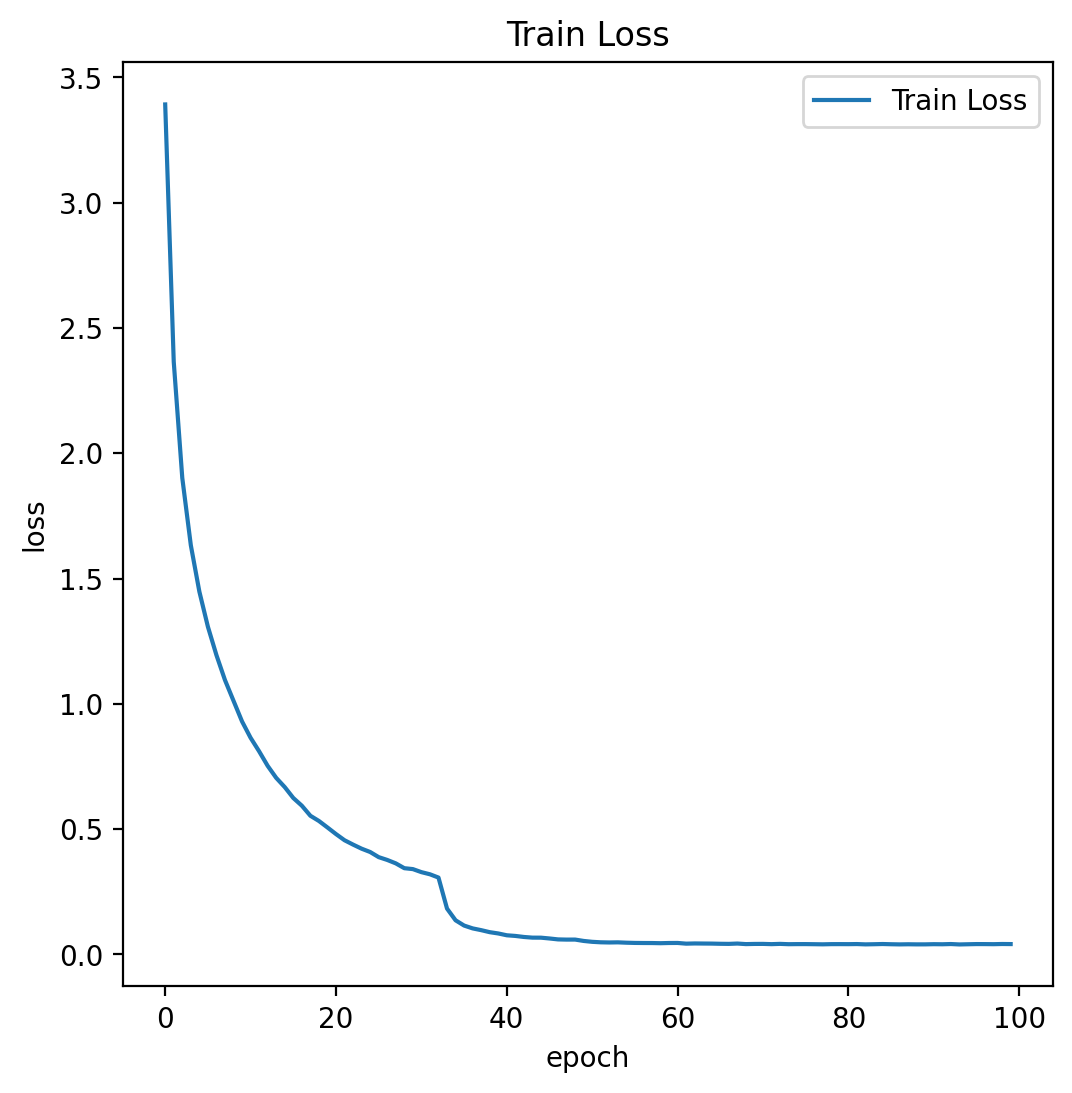

In [60]:
# figure size 설정(subplot)
fig, ax = plt.subplots(figsize=(6,6))

# train loss 그래프 그리기
ax.plot(train_loss_history, label="Train Loss")

# xlabel epoch로 설정
ax.set_xlabel("epoch")
# ylabel loss로 설정
ax.set_ylabel("loss")
# title 설정
ax.set_title("Train Loss")

# label 표시
ax.legend()
# 그래프
plt.show()

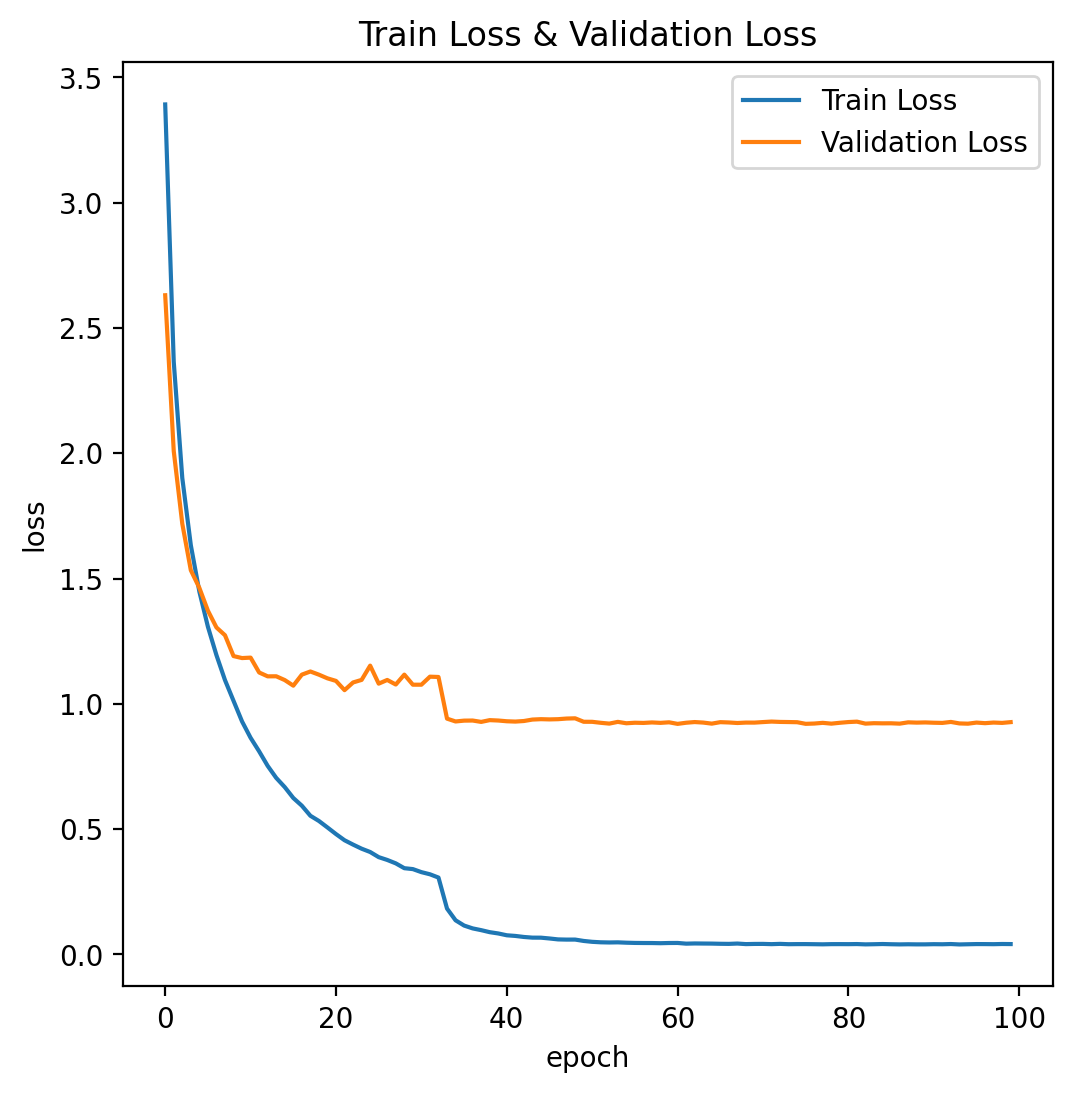

In [61]:
# subplot 그리기
fig, ax = plt.subplots(figsize=(6,6))

# train loss 그리기
ax.plot(train_loss_history, label="Train Loss")
# validation loss 그리기
ax.plot(val_loss_history, label="Validation Loss")

# xlabel 설정
ax.set_xlabel("epoch")
# ylabel 설정
ax.set_ylabel("loss")
# title tjfwjd
ax.set_title("Train Loss & Validation Loss")
# label 표시
ax.legend()
# 그리기
plt.show()

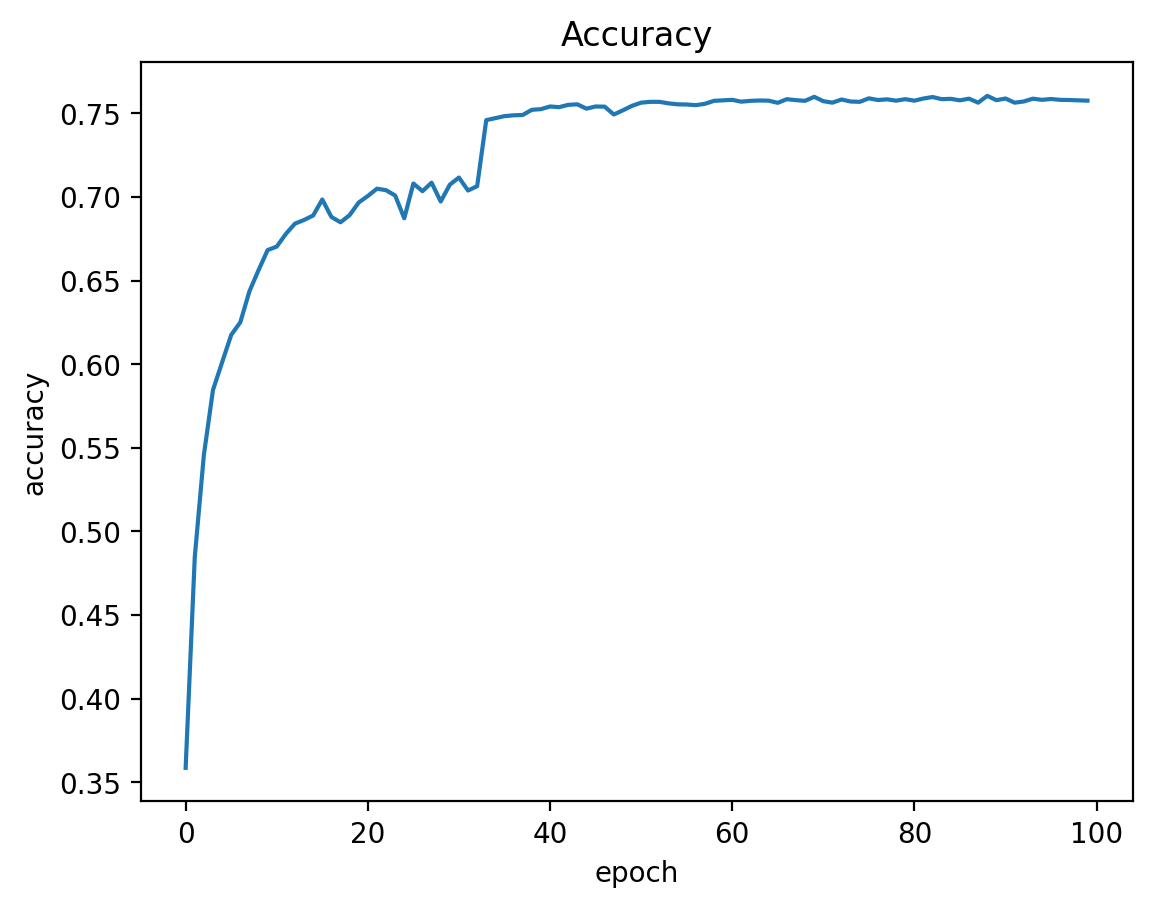

In [62]:
# subplot 설정
fig, ax = plt.subplots()
# accuracy 그리기
ax.plot(accuracy_history, label="Accuracy")
# xlabel 설정
ax.set_xlabel("epoch")
# ylabel 설정
ax.set_ylabel("accuracy")
# title 설정
ax.set_title("Accuracy")
#그리기
plt.show()

In [63]:
# download the dataset
testset = datasets.CIFAR100('DeepLearning', download=True, train=False, transform=transform)

Files already downloaded and verified


In [64]:
# load the training data
batch_size = 64
# # set testloader
testloader = torch.utils.data.DataLoader(
    # with testset, 64 batch, shuffle
    testset, batch_size=batch_size, shuffle=True
)

In [65]:
# Set the device to CUDA if available, otherwise use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
accuracy=0
# Initialize your model 
model = model.to(device)
#load the trained model weights
model.load_state_dict(torch.load('DeepLearning/model_state_dict12.pth'))
# Set the model in evaluation mode
model.eval()

# Initialize counters for correct predictions 
correct = 0
#and total samples
total = 0

# Disable gradient calculation during inference
with torch.no_grad(): 

    # validation set에서 image, label 가져오기
    for images, labels in testloader:
        # image, label device에 저장
        images, labels = images.to(device), labels.to(device) 
        # make a forward pass through the network
        logits = model.forward(images)


        # softmax 함수 이용해 확률값 계산
        probabilities = logits.softmax(dim=1)
        # compute accuracy
        top_probs, top_classes = probabilities.topk(k=1, dim=1)
        # 예측값을 ground truth와 비교
        corrects = (top_classes == labels.view(*top_classes.shape))
        # 맞게 예측한 확률 floating point로 accuracy에 저장
        accuracy += torch.mean(corrects.type(torch.FloatTensor))
            
        # accuracy 계산
    accuracy = accuracy / len(testloader)
print(round(float(accuracy*100),3))


75.766
